Імпортуємо дані:

In [6]:
from parallelized_functions.Matrix import Matrix
from parallelized_functions.ParMiniBatchGradientDescent import ParMiniBatchGradientDescent
import matplotlib.pyplot as plt
import pandas as pd

Виконуємо експеримент з часом виконання алгоритму в залежності від кількості вибірок:

In [7]:
if __name__ == '__main__':
    n_samples_lst = []
    time_lst = []
    for factor in range(1, 11):
        n_samples = 5000 * factor
        X = Matrix([[i * 2,
                     i + 5,
                     i - 10,
                     7 - i,
                     i * (-10)] for i in range(n_samples)])
        X, X_min, X_max = X.normalise()
        y = Matrix([[5 * X[i, 0] - 3 * X[i, 1] + 2 * X[i, 2] - X[i, 3] - 5 * X[i, 4] + 10] for i in range(n_samples)])
        y, y_min, y_max = y.normalise()
        num_iterations = 100
        par_descent = ParMiniBatchGradientDescent(X, y, learning_rate=0.4, num_iterations=num_iterations, batch_size=1024, num_processes=14, max_degree=1, stopping=1e-8)
        time = par_descent.optimize()
        time_lst.append(time)
        n_samples_lst.append(n_samples)

Mini-Batch Gradient Descent Progress:
[===============================================   ] 94%
Early Stopping on iteration 93

Executed in 1.888 seconds
Mini-Batch Gradient Descent Progress:
[===============================================   ] 95%
Early Stopping on iteration 94

Executed in 2.973 seconds
Mini-Batch Gradient Descent Progress:
[===============================================   ] 95%
Early Stopping on iteration 94

Executed in 4.325 seconds
Mini-Batch Gradient Descent Progress:
[===============================================   ] 95%
Early Stopping on iteration 94

Executed in 5.116 seconds
Mini-Batch Gradient Descent Progress:
[================================================  ] 96%
Early Stopping on iteration 95

Executed in 5.726 seconds
Mini-Batch Gradient Descent Progress:
[================================================  ] 96%
Early Stopping on iteration 95

Executed in 6.541 seconds
Mini-Batch Gradient Descent Progress:
[===========================================

Копіюємо час виконання послідовного алгоритму в залежності від того самого набору даних у файлі seqGD_experiments.ipynb:

In [8]:
time_lst_seq = [4.068210, 8.701283, 13.021464, 18.997838, 24.450192, 23.511114, 28.802749, 36.990829, 36.763637, 38.365674]

Візуалізуємо порівняння на графіку:

In [9]:
time_lst

[1.888315200805664,
 2.9733641147613525,
 4.324602127075195,
 5.116434812545776,
 5.726192235946655,
 6.541404962539673,
 8.430988073348999,
 12.048959016799927,
 9.152933120727539,
 11.60883903503418]

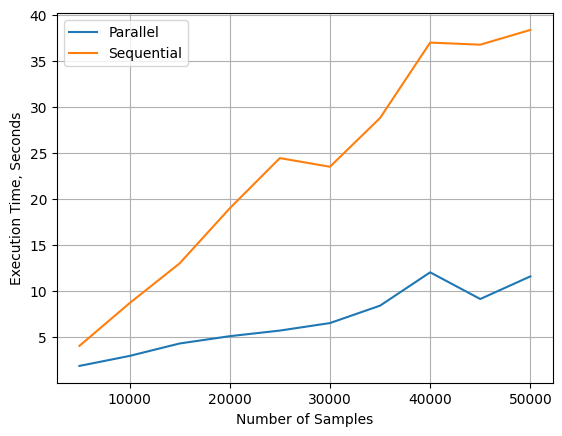

In [10]:
experiment_df = pd.DataFrame({'Execution Time': time_lst, 'Number of Samples': n_samples_lst, 'Sequential Time': time_lst_seq})
plt.plot(experiment_df['Number of Samples'], experiment_df['Execution Time'], label='Parallel')
plt.plot(experiment_df['Number of Samples'], experiment_df['Sequential Time'], label='Sequential')
plt.legend()
plt.xlabel('Number of Samples')
plt.grid()
plt.ylabel('Execution Time, Seconds')
plt.show()

Візуалізуємо дані у таблиці

In [11]:
experiment_df['SpeedUp'] = experiment_df['Sequential Time'] / experiment_df['Execution Time']
experiment_df

,Execution Time,Number of Samples,Sequential Time,SpeedUp
0,1.888315,5000,4.068210,2.154413
1,2.973364,10000,8.701283,2.926410
2,4.324602,15000,13.021464,3.011020
3,5.116435,20000,18.997838,3.713101
4,5.726192,25000,24.450192,4.269887
5,6.541405,30000,23.511114,3.594199
6,8.430988,35000,28.802749,3.416296
7,12.048959,40000,36.990829,3.070044
8,9.152933,45000,36.763637,4.016596
9,11.608839,50000,38.365674,3.304867
